In [32]:
import pandas as pd
df = pd.read_sas('transactions.sas7bdat', format='sas7bdat', encoding='utf-8')

In [36]:
onehot = pd.crosstab(df['Transaction'], df['Product'])
onehot = onehot.astype(bool)

In [38]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(onehot, min_support=0.025, use_colnames=True)

In [40]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.06)

## Basic Understanding:
## 1. Top Support Rules: Which two rules have the highest support? What are their confidence values?

In [46]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(onehot, min_support=0.025, use_colnames=True)

In [48]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.06)

In [50]:
top_2_rules = rules.sort_values(by='support', ascending=False).head(2)
print(top_2_rules[['antecedents', 'consequents', 'support', 'confidence']])

        antecedents       consequents  support  confidence
0  (Greeting Cards)       (Candy Bar)  0.04366    0.297239
1       (Candy Bar)  (Greeting Cards)  0.04366    0.255314


## Task 1 Summary:

- **Rule 1**: *Greeting Cards* → *Candy Bar*
  - Support: 0.04366
  - Confidence: 0.297239

- **Rule 2**: *Candy Bar* → *Greeting Cards*
  - Support: 0.04366
  - Confidence: 0.255314

## 2. Maximum Lift: What is the maximum lift observed? Which rule has this lift value? Interpret what this rule implies

In [54]:
max_lift = rules['lift'].max()

In [56]:
max_lift_rule = rules[rules['lift'] == max_lift]
print(max_lift_rule[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

        antecedents       consequents  support  confidence      lift
0  (Greeting Cards)       (Candy Bar)  0.04366    0.297239  1.738191
1       (Candy Bar)  (Greeting Cards)  0.04366    0.255314  1.738191


## Task 2 Summary:

- **Rule with Maximum Lift**:
  - Antecedents: *Greeting Cards* → *Candy Bar*
  - Consequents: *Candy Bar*
  - Support: 0.04366
  - Confidence: 0.297239
  - Lift: 1.738191

- **Rule with Maximum Lift**:
  - Antecedents: *Candy Bar* → *Greeting Cards*
  - Consequents: *Greeting Cards*
  - Support: 0.04366
  - Confidence: 0.255314
  - Lift: 1.738191

**Interpretation**:  
These rules imply that customers who buy **Greeting Cards** are **1.74 times** more likely to also buy **Candy Bar** (and vice versa) compared to what would be expected if these items were purchased independently. A lift greater than 1 indicates a **positive association**, suggesting that promoting these items together (e.g., discounts or product bundles) could be a valuable marketing strategy.

## 3. Rule 10: What are the antecedents and consequents of Rule 10? Interpret this rule clearly

In [75]:
rule_10 = rules.iloc[9]
print(rule_10[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

antecedents    (Greeting Cards)
consequents          (Magazine)
support                0.036335
confidence              0.24737
lift                   1.025136
Name: 9, dtype: object


## Task 3 Summary:

- **Rule 10**:
  - Antecedents: *Greeting Cards*
  - Consequents: *Magazine*
  - Support: 0.036335
  - Confidence: 0.24737
  - Lift: 1.025136

**Interpretation**:  
This rule indicates that customers who buy **Greeting Cards** are approximately **1.03 times** more likely to also buy **Magazines** than would be expected by chance. Although the lift is only slightly above 1, it suggests a **very weak positive association** between these products. This might imply a minor opportunity for marketing efforts, but given the low lift, it’s not a strong indication that these products are commonly purchased together.

## Visualization-Based Insights:

## 4. Create a rule matrix using a heatmap where:
- **Rows = LHS (antecedents)**
- **Columns = RHS (consequents)**
- **Values = lift**

**From this heatmap:**
- **What is the most common right-hand item in the rules?**
- **What are the left-hand items from the second row of the heatmap?**

In [83]:
# Extract antecedents and consequents as strings
rules['antecedents_str'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents_str'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

In [85]:
pivot_table = rules.pivot_table(
    index='antecedents_str',
    columns='consequents_str',
    values='lift',
    aggfunc='mean'  # or 'max' if you prefer
)

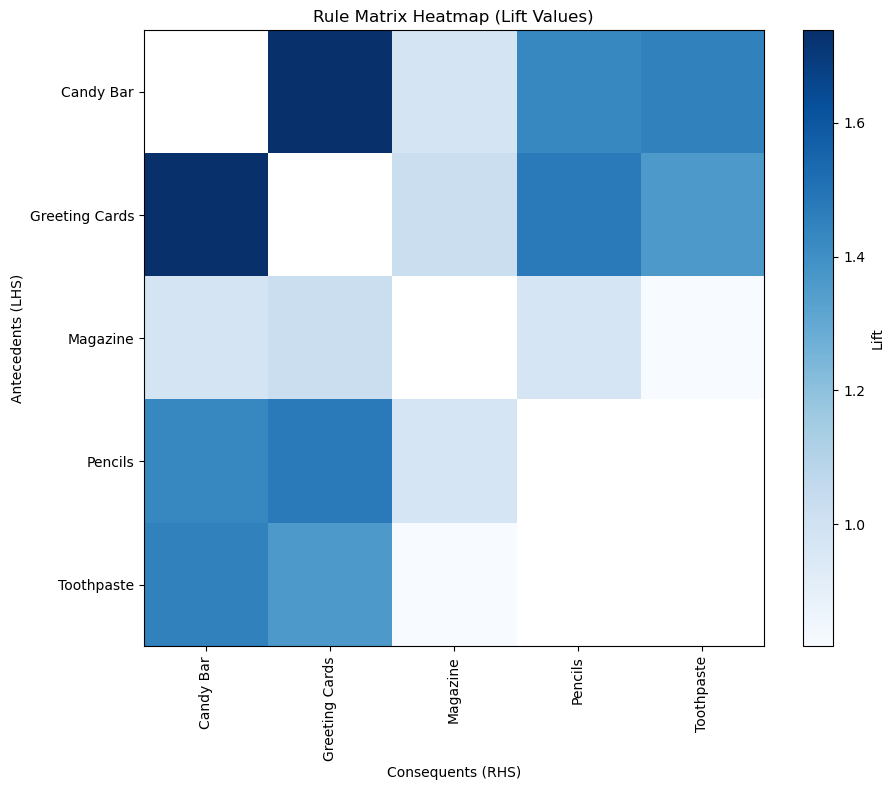

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.title('Rule Matrix Heatmap (Lift Values)')
plt.xlabel('Consequents (RHS)')
plt.ylabel('Antecedents (LHS)')

# Plot the heatmap
plt.imshow(pivot_table, cmap='Blues', aspect='auto')

# Annotate the axes
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns, rotation=90)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)

plt.colorbar(label='Lift')
plt.show()

In [89]:
most_common_rhs = rules['consequents_str'].value_counts().idxmax()
print("Most common RHS item:", most_common_rhs)

Most common RHS item: Candy Bar


In [91]:
second_row_lhs = pivot_table.index[1]
print("Left-hand items from second row:", second_row_lhs)

Left-hand items from second row: Greeting Cards


## Task 4 Summary:

- **Most common RHS item**: *Candy Bar*
- **Left-hand items from second row of heatmap**: *Greeting Cards*

**Interpretation**:  
The most frequent consequent (Candy Bar) suggests it often appears as a recommended or associated product in the rules, indicating its importance in shopping baskets. The second row's antecedent (Greeting Cards) highlights it as a product that frequently triggers associations with other items (like Candy Bar), which could inform product placement or promotional bundling strategies.